I'm gonna do the stereotypical thing and try to compute $\pi$ using Monte Carlo methods.

In [1]:
import math

math.pi # this is the baseline!

3.141592653589793

In [2]:
import numpy as np

# generate pairs of numbers independently-sampled from 
# the uniform distribution on [-1,1]
np.random.uniform(-1,1,2)

array([-0.2436073 , -0.20933644])

A histogram will quickly show this is actually from a uniform distribution.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

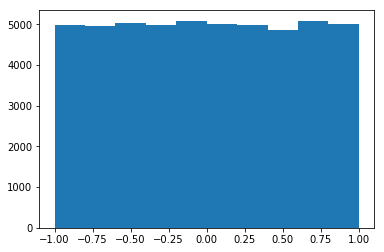

In [4]:
test = np.random.uniform(-1,1,50000)
plt.hist(test)
plt.show()

In consequence, `np.random.uniform(-1,1,k)` samples $k$ points uniformly from the square $[-1,1]^2$. We will be interested in those points that land within the unit circle. This will allow us to get our approximation.

In [5]:
# we need a function to check if a point lands in the unit circle
def in_circle(point):
    x, y = point
    return x**2 + y**2 <= 1.0

# example
in_circle(np.array([0,0.5]))

True

A monte carlo scheme to compute $\pi$ proceeds by sampling randomly from $\text{uniform}([-1,1]^2)$ and counting how many points land in the circle.

In [19]:
num_loops = 5000
# counters
num_of_points_in_circle = 0
num_of_points_total = 0
circle_pts = []
outer_pts = []
for i in range(num_loops):
    x_point = np.random.uniform(-1,1)
    y_point = np.random.uniform(-1,1)
    point = np.array([x_point, y_point])

    if in_circle(point):
        num_of_points_in_circle += 1
        circle_pts.append(point)
    else:
        outer_pts.append(point)
    num_of_points_total += 1

pi = 4 * (float(num_of_points_in_circle) / num_of_points_total)
print(pi)

3.1768


We could visualize this.

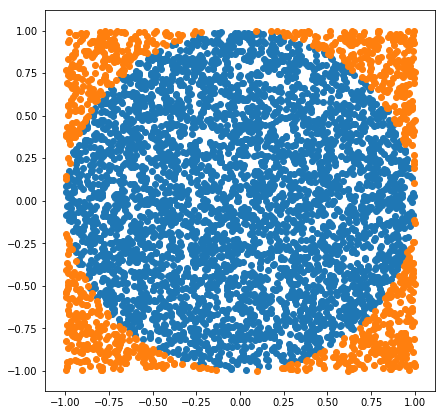

In [20]:
circle_pts = np.array(circle_pts)
outer_pts = np.array(outer_pts)

plt.figure(figsize=(7,7))
plt.scatter(circle_pts[:,0], circle_pts[:,1])
plt.scatter(outer_pts[:,0], outer_pts[:,1])
plt.show()